In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [31]:
df=pd.read_csv('advertising.csv')

In [22]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


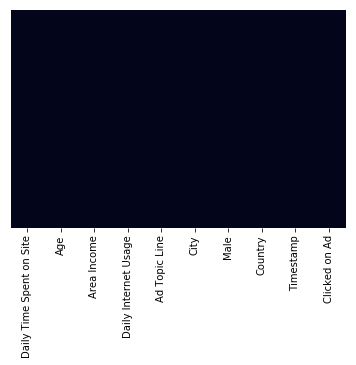

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [24]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [32]:
df.drop(['Ad Topic Line', 'City', 'Country','Timestamp'],axis=1,inplace=True)

In [33]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [43]:
from sklearn.model_selection import train_test_split
X=df.drop(['Clicked on Ad'],axis=1)
y=df['Clicked on Ad']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=105)

In [44]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions=logmodel.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.91      0.88        95
          1       0.91      0.87      0.89       105

avg / total       0.89      0.89      0.89       200



In [47]:
print(confusion_matrix(y_test,predictions))

[[86  9]
 [14 91]]
